In [80]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
import matplotlib.cm as cm
%matplotlib inline
import random 
import time 

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
#from scipy.sparse.linalg import lsqr

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics


#  Note   I was having problems with the other virtual environment so i have switched to the porject one instead of test 
# and sklearn is now working just great.

### Table of Contents
* [ToDO](#ToDO)
* [Introduction](#introduction)

* [Building](#india)

* [Making Predictions](#predictions)

## To Do List  <a class='anchor' id='ToDo' ></a>
### Updated: 20/09/22

* Make a function that takes the test data or real life data and makes predictions by running the data set through each tree I have made and taking an average of the outputted results. 

* Speed up processes perhaps? By far the slowest one is when I am going through data testing for if splitting it at certain points leads to the greatest drop in variance. maybe there are more efficient ways to do this? Cant think of anything at this moment in time.  

* Work on the minimum amount of stuff at the nodes and maximum tree length      Might actually have to learn and do some reading about this. 



## Introduction <a class='anchor' id='introduction'></a>
I am going to build a Random Forest Algorithm, which means first I need to figure out how to build a Decision Tree Algorithm before using a range of different Trees with a subset of the data to make the more effective model. 




First up, because I ultimately want to aim for a model which can predict a value of the power usage in the UK which isnt really a categorized value, I think I want to build it so it will have a continuous output. 

So how does a decision tree work?? We start with, and bear in mind this applies to all types of decision trees, such as classifiers and regression trees,  at the ROOT of the algorithm. Here we have our whole data set, with a Target column, ( the value we want to predict) ie the final price of a house, a list of peoples 100 metre sprint times, the type of fiction which is their favourite. please note that some of these are continuous values while some are obviously categories. We also have in this data a range of different variables which we hope have some relation to the Target data. Relating to the previous examples, we could have the area the house is in, the weights of the sprinters and ages respectively. 

The data is split by looking at the variable column and posing from it a True/False type of question which splits the data in two. Again lets look at the previous examples. If we were thinking about the house price scenario, this would look like:
Is the house in jesmond, True or False, dividing our data into two categories. for the third example, we could split the data into people above or less than 11. 

which splits we make changes for different types of algorithm and we have a few options but the genera; principle remains the same. We choose the split which leads to the greatest DECREASE in entropy, that is, the one which leads to an increase in homogeneity in the data set on either side of the split. For the favourite book example, I am supposing the target data has a few options, like fantasy, crime fiction, romance and adventure stories. I would imagine that splitting the data based on ages you would get a lot of people below 11 who chose adventure stories and few for the other categories and vice versa for above eleven. This would be a good split to make as one of the groups would be largely made up of one category of target data and the entropy of this group would be low, while there would also be a reduction in entropy for the other group as there is now less data in it and also very few of one type of target data, ie, less of a mixture which is synonymous with entropy. 





## How to split the data?

Ok this is a tricky question. There are two problems I think will be tricky to get around and both relate to using continuous data. 

Having continuous variables means that its harder to pose that yes or no question at each node. For categorical variables, we just say it is or it isnt. for example, the question could be the person is a male or the person isnt male, or they live in Byker or they live elsewhere. For continuous data we need to choose a point and then say ok the variable is more or less than this point. When we are initially feeling about and trying to find where to split the data, we need to try out different points in the data and try an entropy change calculation at each one. The simplest way to do this is to divide the data into say, 10 evenly spaced points from the minimum value to the maximum. At each one do a higher or lower and calculate the entropy change for each one. In reality it will probably be more beneficial to concentrate the points around the average of the variable, presuming it will follow a normal distribution but that makes things harder. 

The second and more complicated issue is how we split continuous target data. The way I see it we have three options:
* Higher or lower than the average (mean or median) of the target data. This doesnt make sense actually haha. 
* Split the data into sub groups, i dont know how many. For example in house prices we could split up the prices between the minimum and maximum prices into ten equally spaced categories. This would work like: min price= £40,000, max = £540,000 difference=500,000 , categories = £40,000-£90,000, £90,000-£140,00, ......£490,000-£540,000. 
* Split the data into a higher than or lower than point. Frankly I think it has to be the one above because at the end of the day we want to end up a point where we have a group of data at each leaf node with a certain percentage of them in a certain price range. Nontheless I think there is a place for this method particularly early on in the process, if there is a split that clearly splits the target data between low and high values then that is surely useful.

I have watched a video about regression trees and I think the THIRD answer is actually the correct one. Just because we only use higher and lower splits at the decision nodes does not mean that we cannot group the data at the leaf nodes. For example if we split the data at the first decision node into weights =< 85 KG and weights > 85Kg and look at the weights > 85Kg branch, if the next split was between  weights =< 90Kg and weights > 90 Kg then the leaf node on one side would have 85Kg < values =<90Kg . 

Questions: <a class='anchor' id='questions' ></a>
* How can a decision tree model on its own be a regression model where it just shuffles data down branches to their end nodes??
* How do we group data for continous target data sets?
* How to make a decision tree? 


Answers: 
A way of grouping data suggested for continous target data is to calculate the variance of th child branches. In an extreme example, if you split the data in such a way that all the values in each sector were identical, then the variance would be 0 and this would be a good split. Calculating $\sum_{i,j}(x_{i,j}-<x_j>)^2$ and finding the split which gives the minimum variance is a first good method. Maybe this is the way it has to be when delaing with a continuous target data set!! I think the Shannons entropy calculations I was previously thinking about only work for grouped data. 
### Yes! I have just seen something that says:
Node Splitting can be split into two categories with different things in them. 

#### Categorical Target Variable: <a class='anchor' id='categorical' ></a>

* Gini Impurity
* Information Gain
* Chi-Square

#### Continuous Target Variable
* Reduction in Variance

As I am dealing with a Continuous Problem, it looks like the reduction in variance solution is the way forwards!

## Building Our Algorithm 

### How to handle data <a class='anchor' id='data'></a>

I want to think about how I manage the different types of data that are in the columns. 

There are a two main types to consider, numerical data and data in text. 

The second seems like I have to use a one hot encoder, which brings issues in how many unique values we have but should be straightforward. I will try and build a one-hot encoder and compare this to how an actual one-hot encoder works, trying to get the same results. 

For numerical data I think I can split this into two main categories. Data that is 'continuous', I am not sure if that is the correct word for what i am talking about here because a set of integers is not continuous but what I am referring to is a set which is large and has many unique values, such as the confirmed column in the below table. 

Additionally we have numerical columns that have only a few unique values. For example if we were looking at the house prices examples, I think something like the number of of bathrooms would probably lie in this. Most houses would only have 1-3 bathrooms and much more than this would be unusual. My question is this: Would it be better to treat columns like this in the same way as continuous data, where i split the data at nodes based on higher and lower calculations, or is it better to one-hot encode data? 

#### Target Data
This is possibly more relevant to target data. For the project I am doing we are working with power output, a continuous column evidently. We could have numerical data that I think would be better treated as a grouping, I mean maybe we need to round number up to integers for stuff like how many people are dying but I am talking about things where there is a small number of unqiue values, for example, how many children a couple have together. I guess this links into what mechanism we use at each decision nodes.

For datasets where we have a limited amount of categories and possible values in the target we need to use one of the three methods shown above in [categorical](#categorical). This is actually a simple part of the process. If there are many unique categories then we will use the minimised variance method, whereas if not we will use one of the three methods. 

## Variance 
It is actually very straight forwards to calculate the variance of a data series, simply by using $\color{blue}{df.var()}$, or for specific columns, $\color{blue}{df['column\_name'].var()}$ I wanted to type it out because then I could really see what exactly was going on in the calculation. Notice that there is that weird N-1 term in the last line before i return the function and indeed I need to watch out for that in cases of N=1 in the previous loop. This is simply a feature of the variance and it seems like there is not a particularly straightforwards explanation of it. 

A further note would be that the variance can be described as the squared distance from the mean of the data for each data point that is **averaged across the data points**. 

In [81]:
def variance(data, target):
    mean=data[target].sum()/len(data[target])
    xs=sum([x*x for x in data[target]])
    if len(data[target])==1:
        var=(xs-mean**2*len(data[target]))
    else:
        var=(xs-mean**2*len(data[target]))/(len(data[target])-1)
    return var

## One Hot Encoding 
My understanding of One-Hot Encoding as remembered from when i looked at it now a long time begins with a column of categorical data. This naturally would break a normal random forest algorithm as they are not built to deal with non-numerical data. The solution is to create a new column for each unique categorical value, containing booleans as either 0 or 1 corresponding to if that particular row of data matches the category. For example, a column of car colours has four options, blue, red, green and silver. This column is replaced by four columns. For data rows where the car is red, the red column has a data value of 1, while the other four have 0. 

The great thing about this is that it will now work with the normal method of splitting that data. As we are working with boolean values, there is only one way of splitting the data! So once weve split everything up it should be quick!



In [82]:
def OneHot(df, col):
    new=df[col].unique()
    if df[col].dtypes=='object':
        for i in new:
            df[i]=np.zeros(len(df[col])).astype(int)
            df[i][df[col]==i]=1
        df.drop(col, axis=1, inplace=True)
    return df     

# Decision Tree



In [83]:
def decision_tree(data, target, min_data, max_branches):
    n=0
    leaf=[]
    v, col, sp, s1, s2=split_new(data, target, min_data)
    f=[[col, sp]]
    d =  [[[0], s1], [[1], s2]]
    while n < max_branches:
        n += 1
        new=[]
        print('the size of d is {}'.format(len(d)))
        for i in d:
            try:
                v, col, sp, s1, s2=split_new(i[1], target, min_data)
            except ValueError:
                leaf.append(i)
            t=i[0].copy()
            p=i[0].copy()
            leaf.append(i)
        else:
            t.append(0)
            p.append(1)
            new.append([t, s1])
            new.append([p, s2])
            f.append([col, sp, i[0]])
        d=new
    d.extend(leaf)
    return d, f

I have got the decision tree to work on a limited subset of the trial data. In this limited case it splits the data into 8 different sets, which is what we want. ALso it records the splitting at each node using a kind of binary to show the node location. This is combined with the split dependent variable and the value it is split at. The problem I am having seems to be at some Nodes there are no ways to split the data that will result in a reduced variance so none are made   I think this is the thing which is messing things up but i Cant be sure. 

# Second Splitting Algorithm

This Algorithm was built because the first one was not working. It would be unable to finsd a suitable plit in a dataset that seemed well suited to reduced variance splitting. I found the solution onnline after being confused for longer than i should have been. The problem i had was thus:
* Variance calculations give the average $<x-x_{mean}>^2$, that is, there is an N-1 divisor. 
* I was doing the calculation to minimise $Var_{new_1}+Var_{new_2}$, specifically in relation to $Var_{original}$. 
* Really we want to see the reduction in variance per datapoint. When adding two average variances we are not taking this into account. 
* need to introduce a weighting to the variances. This is easily calculated as $N_{subset}$ the(the subset we were calculating the variance for) divided by $N_{total}$. 

In [84]:
def split_new(dataframe, target, min_leaf):
    n=dataframe[target].unique().sum()
    variables=dataframe.drop(target, axis=1, inplace=False) #this drops the target column from the data for the next line
    var=[variance(dataframe, target), 0,0,0, 0] # making an array to contain information about how the split is made
    for col in variables.columns:
        if dataframe[col].dtypes=='int64' or 'float64':
            c=dataframe.sort_values(col) #This sorts each of the variable columns 
            u=c[col].unique()            
            for i in range(0, len(u)-1): #np.linspace(0, len(u)-1):
                split=(u[i]+u[i+1])/2
                l=len(dataframe)
                s1=pd.DataFrame(dataframe[dataframe[col]<split])
                s2=pd.DataFrame(dataframe[dataframe[col]>split])    
                v=variance(s1, target)*len(s1)/l+variance(s2, target)*len(s2)/l # This is where I introduced a weighting, outlined above
                if v<var[0] and len(s1)>min_leaf and len(s2)>min_leaf:
                    var=[v, col, split, s1, s2]
    if var[1]==0:
        var='leaf'
    return var

# Plotting Code
It seems it will be helpful to be able to see how the data has been split, depending on a variable and with the option of plotting all splits together or sharing an axis but with different plots, to allow for comparison. 


In [85]:
def plot(data, variable, target):
    graph=input('select whether you want singular or multiple')
    groups=len(data)
    if graph=='singular':
        fig, ax =plt.subplots(figsize=(15,15))
        for i in range(groups-1):
            ax.scatter(data[i][1][variable],data[i][1][target])
    elif graph == 'multiple':
        fig, axs =plt.subplots(groups, figsize=(10,5*groups), sharex=True)
        axs[0].scatter(data[0][1][variable], data[0][1][target])
        for i in range(1, groups-1):
            axs[i].scatter(data[i][1][variable], data[i][1][target])
    else:
        print('you need to choose between multiple and singular')
    plt.show()
    return 

# House price Data
How prices in India, with straighforwards variable columns. 


On Kaggle this is saved as:
**House Rent Prediction Dataset**

In [86]:
pd.set_option('display.max_columns', 10)
house=pd.read_csv('data\House_Rent_Dataset.csv')
house.drop(["Posted On", 'Area Locality'], axis=1, inplace=True ) #With the one-hot encoding i am doing this makes the dataframes too long
for i in house.columns:
    house=OneHot(house, i)
print(len(house))
train_house=house.head(4000)
test_house=house.tail(746)

4746


# Decision tree 2
This is a modified one which will look more towards the second part, classifying new data. 

The difference is now I dont just care about getting data split and leaf nodes with the variance minimised but also I am keeping track of the splitting that occurs at each node. There are three different bits of information that I need to keep track of:
* Which variable is the data being split on
* At what point in the data it is split
* for which part of the tree and therefore subset of data is the split for.

In [87]:
def decision_tree_2(data, target, min_data, max_branches):
    n=0
    leaf=[]
    v, col, sp, s1, s2=split_new(data, target, min_data)
    f=[[col, sp, 0]]
    d =  [[[0], s1], [[1], s2]]
    while n < max_branches:
        n += 1
        new=[]
        print('the size of d is {}'.format(len(d)))
        for i in d:
            #print('checking whats up')
            try:
                v, col, sp, s1, s2=split_new(i[1], target, min_data)
                t=i[0].copy()
                p=i[0].copy()
                if col == 0: #The idea of this is that, from the new_split function, if the data cannot be split anymore, the col column will be empty so we know to add this to the list
                    leaf.append(i)
                    f.append([0, 0, i[0], i[1][target].mean()])
                else:#elif len(i[1])>min_data:
                    t.append(0)
                    p.append(1)
                    new.append([t, s1])
                    new.append([p, s2])
                    f.append([col, sp, i[0]])
            except ValueError: #This was brought in to sort a weird error where the algortithm was only finding 4 values from the list when there was five
                leaf.append(i)
                f.append([0, 0, i[0], i[1][target].mean()])
        d=new
    for j in d:
        f.append([0, 0, j[0], j[1][target].mean()])
    d.extend(leaf)
    return d, f

In [88]:
M, E=decision_tree_2(train_house, 'Rent', 10, 4)# Changed to 2 branches to compare to my decision tree model
print(E)

the size of d is 2
the size of d is 4
the size of d is 8
the size of d is 14
[['Bathroom', 3.5, 0], ['Contact Owner', 0.5, [0]], ['Mumbai', 0.5, [1]], ['Bathroom', 2.5, [0, 0]], ['Size', 1424.5, [0, 1]], ['Size', 2771.0, [1, 0]], ['Size', 2940.0, [1, 1]], ['Mumbai', 0.5, [0, 0, 0]], ['Size', 2465.0, [0, 0, 1]], ['Mumbai', 0.5, [0, 1, 0]], ['Bathroom', 2.5, [0, 1, 1]], ['Unfurnished', 0.5, [1, 0, 0]], ['Size', 3175.0, [1, 0, 1]], ['Size', 1777.5, [1, 1, 0]], [0, 0, [1, 1, 1], 598461.5384615385], ['Size', 1262.0, [0, 0, 0, 0]], ['Size', 833.5, [0, 0, 0, 1]], ['Mumbai', 0.5, [0, 0, 1, 0]], ['Size', 2840.0, [0, 0, 1, 1]], ['Bathroom', 1.5, [0, 1, 0, 0]], ['Size', 707.0, [0, 1, 0, 1]], ['BHK', 2.5, [0, 1, 1, 0]], ['Delhi', 0.5, [0, 1, 1, 1]], ['Size', 2158.5, [1, 0, 0, 0]], [0, 0, [1, 0, 0, 1], 124818.18181818182], [0, 0, [1, 0, 1, 0], 136500.0], [0, 0, [1, 0, 1, 1], 191296.2962962963], ['Size', 1327.5, [1, 1, 0, 0]], ['Size', 2145.0, [1, 1, 0, 1]], [0, 0, [0, 0, 0, 0, 0], 17372.78947368421

select whether you want singular or multiplesingular


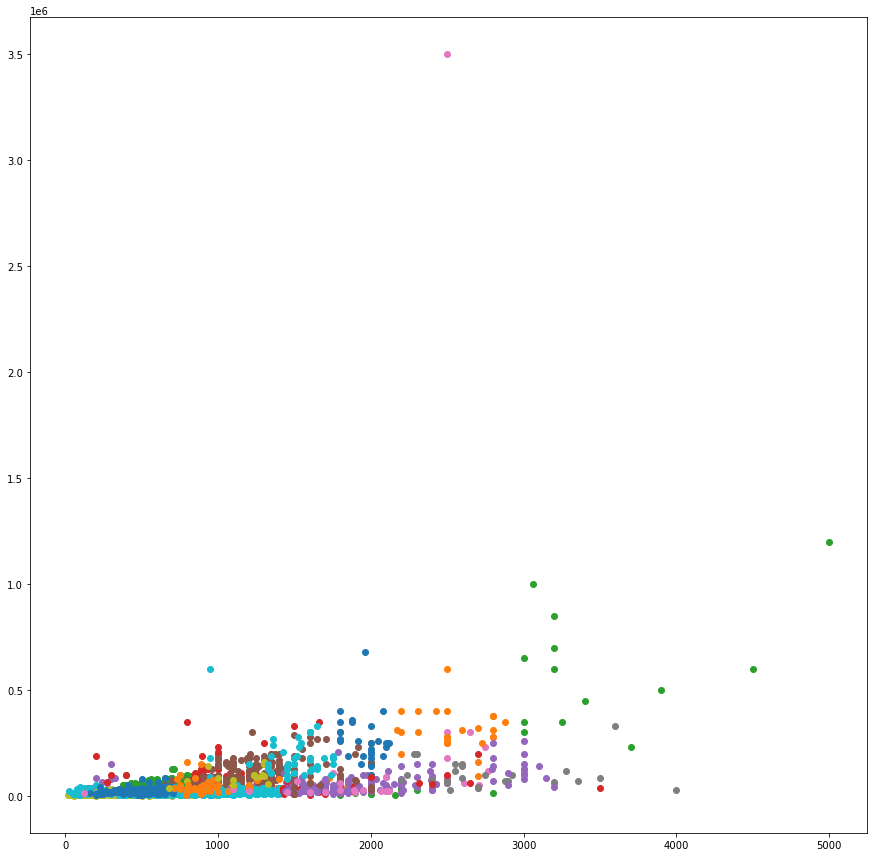

In [89]:
plot(M, 'Size', 'Rent')

# 12/09/2022  Decision treeing data

I am now at a stage where I have my decision tree and i need to start passing data rows down the branches to the leaf nodes. Currently the 'tree' is in the form of a list of sublists, each containing infomation about a node position and the splitting value. I think the best way to do it, while time expensive ,is to search through this jumble, finding the appropriate node at each layer. Thinking about it, It would be far easier if the tree was somehow reorgansied in a way similar to how it is visualised. It is easiest to sort the tree before putting data into it, rather than having to search through each node every time. that way when we know how the data is in respect to each node we know where to send it next. 

In [90]:
def plant(leaves):
    E=leaves
    max=len(E[-1][2])
    branch=[]
    for i in range(0, max+1):
        y=np.zeros(2**i).tolist()
        for j in E[1:]:
            if len(j[2])==i:
                n=0           
                for k in range(len(j[2])):
                    if j[2][k]==1:
                        n+=2**(len(j[2])-k-1)
                y[n]=j 
        branch.append(y)
    branch[0][0]=E[0]
    return branch

Happily, it seems that the above code does work and it formats the information given by the training data into something resembling a tree, which hopefully we can use to make decisions. 

I have done this by means of a list with sublists inside which represent each layer of nodes down the tree. Wherever we reach a leaf before the end of the tree the spaces below which would represent further node are instead merely 0s. 

In [91]:
print(E[0])
#print(branch[2][-1])
#print(M[-2][1])
#plt.scatter(M[-2][1]['Size'],M[-2][1]['Rent'])
print(plant(E))
branch=plant(E)

['Bathroom', 3.5, 0]
[[['Bathroom', 3.5, 0]], [['Contact Owner', 0.5, [0]], ['Mumbai', 0.5, [1]]], [['Bathroom', 2.5, [0, 0]], ['Size', 1424.5, [0, 1]], ['Size', 2771.0, [1, 0]], ['Size', 2940.0, [1, 1]]], [['Mumbai', 0.5, [0, 0, 0]], ['Size', 2465.0, [0, 0, 1]], ['Mumbai', 0.5, [0, 1, 0]], ['Bathroom', 2.5, [0, 1, 1]], ['Unfurnished', 0.5, [1, 0, 0]], ['Size', 3175.0, [1, 0, 1]], ['Size', 1777.5, [1, 1, 0]], [0, 0, [1, 1, 1], 598461.5384615385]], [['Size', 1262.0, [0, 0, 0, 0]], ['Size', 833.5, [0, 0, 0, 1]], ['Mumbai', 0.5, [0, 0, 1, 0]], ['Size', 2840.0, [0, 0, 1, 1]], ['Bathroom', 1.5, [0, 1, 0, 0]], ['Size', 707.0, [0, 1, 0, 1]], ['BHK', 2.5, [0, 1, 1, 0]], ['Delhi', 0.5, [0, 1, 1, 1]], ['Size', 2158.5, [1, 0, 0, 0]], [0, 0, [1, 0, 0, 1], 124818.18181818182], [0, 0, [1, 0, 1, 0], 136500.0], [0, 0, [1, 0, 1, 1], 191296.2962962963], ['Size', 1327.5, [1, 1, 0, 0]], ['Size', 2145.0, [1, 1, 0, 1]], 0.0, 0.0], [[0, 0, [0, 0, 0, 0, 0], 17372.78947368421], [0, 0, [0, 0, 0, 0, 1], 42000.0]

# Making Predictions <a class='anchor' id='predictions' ></a>


Now to start feeding data into my model and making predicitons from it. Essentially all I need is the Node tree which I built in the previous section. Data will be fed down this tree with each node outcome directing the data to the next node until it reaches a leaf. At this point the target value given to the data point is the average of all training data target values at that leaf. 

In [92]:
def predict(data, branch, name):
    data=data.reset_index(drop=True)
    data[name]=np.zeros(len(data))
    for j in range(len(data)):
        p=data.loc[j, :]
        if p[branch[0][0][0]]<branch[0][0][1]:
            sep=[0] 
        else:
            sep=[1]
        val='bol'
        for i in range(1, len(branch[1:])):
            n=0           
            for k in range(len(sep)):
                if sep[k]==1:
                    n+=2**(i-k-1)
            if len(branch[i][n])==4:
                val=branch[i][n][3]
                break ##Added to try and sort out code not working. If this above condition is made we have reached 
                # the leaf and need to not try and travel further down the tree!
            elif p[branch[i][n][0]]<branch[i][n][1]:
                sep.append(0)
            else:
                sep.append(1)
        if val=='bol':
            n=0           
            for k in range(len(sep)):
                if sep[k]==1:
                    n+=2**(len(sep)-k-1)
            val=branch[-1][n][3]
        data.at[j, name]=val
    return data

In [93]:
test_house_2=test_house.copy()
test_house_predicts=predict(test_house_2, branch, 'predictions')
print(test_house_predicts)

     BHK    Rent  Size  Bathroom  Ground out of 2  ...  Family  Contact Owner  \
0      2   18000   242         2                0  ...       0              1   
1      2    9500   720         2                0  ...       0              1   
2      3   49000  1800         3                0  ...       0              0   
3      1    9000   450         1                0  ...       0              1   
4      2  130000   130         2                0  ...       0              1   
5      2    8000   690         2                0  ...       0              1   
6      2   13000  1000         2                0  ...       0              1   
7      3   18000  1500         2                0  ...       0              1   
8      3   18000  1150         3                0  ...       0              1   
9      3   32000  1783         2                0  ...       0              1   
10     2   15000   900         2                0  ...       0              1   
11     3   35000  1725      

In [94]:
#print(test_house_predicts['predictions'])
varr=(test_house_predicts['Rent']-test_house_predicts['predictions'])**2
#print(varr)
#print(varr.sum())

# Moving from Decision Tree to Random Forest
Now that I have a working decision tree I have some options for my next step. I could look into how deep I want my trees to go, what I should set the minimum leaf node to be and generally have a look at how to fight overfitting and underfitting. This has never really appealed haha so I am quite keen for the second option which is to look at the **ensemble** version, which is the Random Forest model. 

There are two ways that we change the data used for each decision tree within the forest. 
* Select a random subset of the data
* Only use some of the feautures (The variable columns) of the data in each decision tree


The second I think is really smart as some variable columns will have a strign influence over the target column and so will tend to dominate the decision trees.   Leaving them out seems kind of good. It will let the other variable columns have a turn.
I need to know:
* How to split the data, what percentage of data do we use in each tree
* Which columns to choose from at each node. 
* Eventually need to find how many trees I need.  


**How many trees?** Seen an article which is saying that basically the more trees you include the better your results but then we have the drawbacks of processing time. It seems to the base that around 60 Trees would be great. Have to take into account that my algorithm is a bit slow even for one decision tree!




Some useful definition:
* **Features/Predictors:** the 'dependent' variables, the columns in the data which arent target data. 
* **Column Sampling:** the practice of only using a few cols.
* **Maximum Features** This is what sklearn calls the setting where you decide the amount of randomly selected features which can split the data at each node. 

### Which data to use for each Tree / Sampling
**Bootstrapping** Drawing sub-samples from the main sample and repeating multiple times, each one drawing different random ones from a complete main sample. 

**Key Point** It seems to be the case that when we bootstrap we select a data point and replace it straight away **So it can be selected more than one time in the sample!** The actual size should match the original sample size. 


**Bagging**-Bootstrap + Aggregation.  I think this is just doing boostrapping as outlined above and then taking an average of the produced results. 

Interesting fact about bootstrapping:

To begin with we have a data set of size n. The probability of selecting a specific sample is given by $\frac{1}{n}$. I think it is important to note that in this mathematical explanation, as in the bootstrapping we will do in the random forest, we keep 'fishing' from the original sample, once weve selected a sample from it we can take that sample again, it doesnt change in size or anything like that. 
Probability of not getting selected:

$1-\frac{1}{n}$

If we repeat this n times, which will give us a bootstrapped sample of size n:

$(1-\frac{1}{n})^n$ 

This is the probability of NOT selecting a given sample. 

I dont really know how to prove it other than like :

$(1+\frac{x}{n})^n=(1+\frac{2x}{n}+\frac{x^2}{n^2})(1+\frac{x}{n})^{n-2}=(1+\frac{3x}{n}+\frac{3x^2}{n^2}+\frac{x^3}{n^3})(1+\frac{x}{n})^{n-3}$ 

Basically this seems to come out as:

$(1+\frac{x}{n})^n=1+x+\frac{x^2}{n}+\frac{x^3}{n^2}.....$

 this is not quite the same thing as 
 
 $e^x=1+x+\frac{x^2}{2}+....$
 so maybe I have gotten confused at some point.
 
 Anyhoo, setting $x=-1$ we get $e^{-1}$=0.32 thats the probability of a data point NOT being selected in a bootstrapping of the same size as the original sampling. 

## Building a bootstrapper.

Now I need to get my bootstrapped data. I need to use replacement when I do this. This is simply for training a model so dont need to worry about things too much. 


This is to get bootstrapped data for which to train different decision trees.


In [95]:
def bootstrap(train):
    boot=train.copy()
    n=len(boot)
    vals=np.random.randint(n, size=n)
    b=pd.DataFrame()
    for i in vals:
        b=pd.concat([b,boot.loc[i,:]], axis=1)
    b=b.T#.reset_index(drop=True)   ## Note sure if I need to reset the index for the algorithm to work or not.
    return b
b=bootstrap(train_house.head(100))

## Column Sampling

### Which predictors used at each node??

* For each tree you set a certain number of categories available at each node, say a random 10 percent of the total. At the next nodes in the tree you change which predictors are available to split the data. **Columns are not randomly selected at tree level but change at different nodes in the tree!**
* The amount of predictors available at each node has been recommended as $\sqrt{M}$, where M is the total amount of predictors, while I have also seen it recommended to use $\frac{M}{3}$ for regression models which is what I am using. 

In regards to how many of the predictors we should randomly choose from at each node, I think the idea is to try and get less prominent nodes involved. Even though we are randomly sampling the train data for each different tree, we expect that there will be some predictors which will lead to a good decrease in variance and will be favoured. Somehow it seems it will improve the model to allow other factors which offer good and useful splitting in the data, just less good. It kind of makes sense that it still looks for good splitting but it just means that other variables and their influence come to the fore. Thinking about it, it makes sense and seems like a good idea. $\frac{M}{3}$ sounds good.

**Note:** Something I need to think about is how we deal with the categorical variables which I treated with the oneHotEncodign method. This kind of messes things up when we dont use all of the predictors because there are as many columns as there are different variables in the categorical column. 

I will start with the decision tree maker that I previously made and I just need to make some small changes in it. I think actually I need to make the changes to the split code that is used within this as this is the code which is used to decide how the split is made

In [96]:
def rf_trees(data, target, min_data, max_branches, max_features):
    print('I hope youve inputted the max_features option as a decimal percentage')
    #max_features=input('please input a decimal to get a percentage of the total columns')
    #max_features=float(max_features)
    n=0
    leaf=[]
    v, col, sp, s1, s2=split_rf(data, target, min_data, max_features)
    f=[[col, sp, 0]]
    d =  [[[0], s1], [[1], s2]]
    while n < max_branches:
        n += 1
        new=[]
        #print('the size of d is {}'.format(len(d)))
        for i in d:
            #print('checking whats up')
            try:
                v, col, sp, s1, s2=split_rf(i[1], target, min_data, max_features)
                t=i[0].copy()
                p=i[0].copy()
                if col == 0: #The idea of this is that, from the new_split function, if the data cannot be split anymore, the col column will be empty so we know to add this to the list
                    leaf.append(i)
                    f.append([0, 0, i[0], i[1][target].mean()])
                else:#elif len(i[1])>min_data:
                    t.append(0)
                    p.append(1)
                    new.append([t, s1])
                    new.append([p, s2])
                    f.append([col, sp, i[0]])
            except ValueError: #This was brought in to sort a weird error where the algortithm was only finding 4 values from the list when there was five
                leaf.append(i)
                f.append([0, 0, i[0], i[1][target].mean()])
        d=new
    for j in d:
        f.append([0, 0, j[0], j[1][target].mean()])
    d.extend(leaf)
    return d, f

In [97]:
def split_rf(dataframe, target, min_leaf, max_features):
    n=dataframe[target].unique().sum()
    variables=dataframe.drop(target, axis=1, inplace=False) #this drops the target column from the data for the next line
    n_cols=round(len(variables.columns)*max_features) #The number of random columns we will look at
    options=variables.columns.tolist() #A list of all column names in the data set
    select=random.sample(range(len(variables.columns)), n_cols) # how to randomly sel
    colls=[]
    for i in select:
        colls.append(options[i])
    var=[variance(dataframe, target), 0,0,0, 0] # making an array to contain information about how the split is made
    for col in colls:
        if dataframe[col].dtypes=='int64' or 'float64':
            c=dataframe.sort_values(col) #This sorts each of the variable columns 
            u=c[col].unique()            
            for i in range(0, len(u)-1): #np.linspace(0, len(u)-1):
                split=(u[i]+u[i+1])/2
                l=len(dataframe)
                s1=pd.DataFrame(dataframe[dataframe[col]<split])
                s2=pd.DataFrame(dataframe[dataframe[col]>split])    
                v=variance(s1, target)*len(s1)/l+variance(s2, target)*len(s2)/l # This is where I introduced a weighting, outlined above
                if v<var[0] and len(s1)>min_leaf and len(s2)>min_leaf:
                    var=[v, col, split, s1, s2]
    if var[1]==0:
        var='leaf'
    return var

In [98]:
train_house.head()

,BHK,Rent,Size,Bathroom,Ground out of 2,...,Bachelors,Family,Contact Owner,Contact Agent,Contact Builder
0,2,10000,1100,2,1,...,0,0,1,0,0
1,2,20000,800,1,0,...,0,0,1,0,0
2,2,17000,1000,1,0,...,0,0,1,0,0
3,2,10000,800,1,0,...,0,0,1,0,0
4,2,7500,850,1,0,...,1,0,1,0,0


In [99]:
data, splits=rf_trees(train_house, 'Rent', 10, 2, 0.33)

I hope youve inputted the max_features option as a decimal percentage


As predicted, the OneHotEncoding is throwing up some problems!! There are simply too many columns, particularly looking at theone which says what kind of apartment it is!


In [100]:
pd.set_option('display.max_columns', 10)
house=pd.read_csv('data\House_Rent_Dataset.csv')
house.drop(["Posted On", 'Area Locality', 'Floor'], axis=1, inplace=True ) #With the one-hot encoding i am doing this makes the dataframes too long
for i in house.columns:
    house=OneHot(house, i)
print(len(house))
train=house.head(4000)
test=house.tail(746)

4746


In [101]:
#data, splits=rf_trees(train, 'Rent', 10, 4, 0.33)
#print(E)
#print(splits)

## Combining into a forest
We are now at the point where we need to combine the previous two features, Bootstrapping and column sampling to start training multiple trees. The output of this section will hopefully be a list of trees in their list form I built previously. 

In [102]:
def random_forest(training_data, target, min_data, max_branches, max_features, n_trees):
    trees=[]
    for i in range(n_trees):
        data=bootstrap(training_data)
        leaves, splits=rf_trees(data, target, min_data, max_branches, max_features)
        branch=plant(splits)
        trees.append(branch)
    return trees

### General Notes
I have done a test run of my random forest algorithm and it seems to work! It is slow though so Maybe I will look at means of speediing things up. 

In [103]:
tree=random_forest(train, 'Rent', 10, 5, 0.33, 1)
print(tree[0])

I hope youve inputted the max_features option as a decimal percentage
[[['Contact Owner', 0.5, 0]], [['Bathroom', 3.5, [0]], ['Bathroom', 3.5, [1]]], [['Bathroom', 2.5, [0, 0]], ['Furnished', 0.5, [0, 1]], ['Bathroom', 1.5, [1, 0]], [0, 0, [1, 1], 112965.5172413793]], [['Kolkata', 0.5, [0, 0, 0]], ['Mumbai', 0.5, [0, 0, 1]], ['Semi-Furnished', 0.5, [0, 1, 0]], ['Size', 2274.0, [0, 1, 1]], ['Mumbai', 0.5, [1, 0, 0]], ['Chennai', 0.5, [1, 0, 1]], 0.0, 0.0], [['Bathroom', 1.5, [0, 0, 0, 0]], ['Size', 705.0, [0, 0, 0, 1]], ['Unfurnished', 0.5, [0, 0, 1, 0]], ['Family', 0.5, [0, 0, 1, 1]], ['Bachelors', 0.5, [0, 1, 0, 0]], ['Delhi', 0.5, [0, 1, 0, 1]], [0, 0, [0, 1, 1, 0], 202312.5], [0, 0, [0, 1, 1, 1], 457500.0], ['Size', 750.5, [1, 0, 0, 0]], ['Bachelors/Family', 0.5, [1, 0, 0, 1]], ['Bathroom', 2.5, [1, 0, 1, 0]], ['Furnished', 0.5, [1, 0, 1, 1]], 0.0, 0.0, 0.0, 0.0], [['Furnished', 0.5, [0, 0, 0, 0, 0]], ['Size', 644.5, [0, 0, 0, 0, 1]], ['Super Area', 0.5, [0, 0, 0, 1, 0]], [0, 0, [0,

## Predictions 2
Now it is time to make a predictions for the target columns of the test data set by using each decision tree in the random forest and taking an average. 

In [104]:
def forest_predict(data, tree):
    n=0
    start=len(data.columns)
    for i in tree:
        name='prediction_{}'.format(str(n))
        n+=1
        data=predict(data, i, name)
    preds=data.iloc[:,start:]
    data['final_predictions']=preds.T.mean().round(1).tolist()
    return data

In [105]:
nearly=forest_predict(test, tree)

In [106]:
pd.set_option('display.max_rows', None)
#preds=nearly.iloc[:,len(test.columns):]
#print(preds.T.mean().tolist())
#print(nearly[['Rent', 'final_predictions']])
print(nearly['Rent']-nearly['final_predictions']) 
#print(nearly.loc[4:8,:])
query=pd.read_csv('data\House_Rent_Dataset.csv')
print(query.loc[4004,:])
#print(query[query['Floor']=='1 out of 1'])
print(len(query['Floor'].unique()))

0        -346.2
1       -8846.2
2       10840.9
3         790.4
4      111653.8
5      -10346.2
6       -5346.2
7        -346.2
8       -9147.3
9       13653.8
10      -3346.2
11       7852.7
12      -2209.6
13        790.4
14      -8846.2
15      -5846.2
16       6653.8
17      -3346.2
18     -15024.5
19       1653.8
20     -12147.3
21      93785.8
22       -147.3
23      -2346.2
24      -5346.2
25      -8346.2
26      -8346.2
27      -1346.2
28      -5846.2
29      -2147.3
30       7852.7
31        102.8
32      -6346.2
33      -3346.2
34       6840.9
35       1653.8
36      -3346.2
37      -8346.2
38     -12147.3
39       1453.8
40      -9846.2
41    -327500.0
42      -3397.2
43      -3709.6
44      -9346.2
45       4790.4
46       -346.2
47      -1147.3
48     -20704.5
49      -9346.2
50       -209.6
51      -8346.2
52      -6346.2
53      -4346.2
54       6653.8
55       3653.8
56     -67965.5
57     -53352.9
58      -2346.2
59       7852.7
60      -3346.2
61     -14301.3
62      

### How is algorithm performing?
We have reached a point where we are making predictions, based on the average across 10 decision trees in a random forest model training on the complete data set. 

I still to think about how I sample the feature columns in the decision tree when I need to use OneHotEncoding on some of them. This issue means I have left out the Area Locality, which frankly I don't think is suited this type of algorithm as there are over 2000 different values and they are of course strings instead of continuous data. 

Equally, the floor type has 480 different values so doesnt lend itself to beign treated with the one-hot-encoder either. The greatest problem with this is that if I have already applied the encoder and then I run it through trees where we are only paying attention to $\frac{1}{3}$ of the feature columns, these are completely dominated by the floor columns. 

Basically, I have concerns about how suitable the data set and its features are to be used in this type of regression model. 

A next and important step would be to test the algorithm with a new data set. 

### Mean Absolute error

In [107]:
#print(nearly['final_predictions'])
abso=(nearly['Rent']-nearly['final_predictions']).abs()
perc=abso/nearly['Rent']
print(abso.mean())
print(perc.mean())

12248.869973190358
0.7067460215895138


## Comparing my model to the SkLearn one

In [108]:
pd.set_option('display.max_columns', 10)
house=pd.read_csv('data\House_Rent_Dataset.csv')
house.drop(["Posted On", 'Area Locality', 'Floor'], axis=1, inplace=True ) #With the one-hot encoding i am doing this makes the dataframes too long
for i in house.columns:
    house=OneHot(house, i)
train=house.head(4000)
test=house.tail(746)
Y_train=train['Rent']
Y_test=test['Rent']
X_train=train.drop('Rent',axis=1)
X_test=test.drop('Rent',axis=1)
regressor=RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, Y_train)
Y_predict=regressor.predict(X_test)
print(type(Y_predict))
#print(nearly['final_predictions'])
abso=(Y_test-Y_predict).abs()
perc=abso/Y_test.tolist()
print(perc.mean())

<class 'numpy.ndarray'>
0.47382655344844216


This shows that the SKlearn model performs slightly better for the same amount of estimators, with an absolute error of 0.47, compared to 0.57 for my model. 

In [109]:
regressor=RandomForestRegressor(n_estimators=10, random_state=None)
regressor.fit(X_train, Y_train)
Y_predict=regressor.predict(X_test)
print(type(Y_predict))
#print(nearly['final_predictions'])
abso=(Y_test-Y_predict).abs()
#perc=abso/Y_test.tolist()
#print(perc.mean())
print(abso.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))

<class 'numpy.ndarray'>
8701.452775387073
Mean Absolute Error: 8701.452775387077


Interestingly, when the number of estimators is drastically increased, it barely performs better. So why does their model perform better than mine?
Probably because of the limit in tree length I have imposed, other than that I need to know more about the functioning of the SKlearn one. It might be interesting to increase the maximum length of the trees and see what that does to performance. 

Looking thorugh the documentation for the sklearn RandomForestRegressor, it seem slike it works in exactly the same way as my algorithm so I should have the same results.  The only difference that i could think of off the top of my head was the tree depth. 

In [110]:
st=time.time()
tree_2=random_forest(train, 'Rent', 10, 5, 0.33, 1)
end=time.time()
print('forest making is :', end-st)
predictions=forest_predict(test, tree_2)
abso=(predictions['Rent']-predictions['final_predictions']).abs()
print('Mean absolute error:', abso.mean())

I hope youve inputted the max_features option as a decimal percentage
forest making is : 29.159693241119385
Mean absolute error: 10812.463270777485


In [111]:
def m_a_e(predictions, target):
    abso=(predictions[target]-predictions['final_predictions']).abs()
    print('Mean absolute error:', abso.mean())

In [112]:
m_a_e(predictions, 'Rent')

Mean absolute error: 10812.463270777485


For 100 estimators, the scikit learn algorithm has a m_a_e of 85. This amount doesnt improve with increasing it more, but is better than when the amount is less (around 10 it was way worse). 

In [134]:
values=[2,2,2,8,8,8]
v2=values.copy()
v2.remove(2)
v2.remove(8)
v3=[2,8]
print(values)
print(v2)
print(np.var(v2)*2/3, np.var(v3)*1/3, np.var(values))

[2, 2, 2, 8, 8, 8]
[2, 2, 8, 8]
6.0 3.0 9.0
